# European languages

# data

- Special Eurobarometer 386: [EBS386.csv](https://github.com/wdbm/languages/blob/master/EBS386.csv)
- World Happiness Report 2017: [World_Happiness_Report_2017.csv](https://github.com/wdbm/languages/blob/master/WHR2017.csv)

# references

- <https://en.wikipedia.org/wiki/Languages_of_the_European_Union#Knowledge>
- [Europeans and Their Languages -- Special Eurobarometer 386 / Wave EB77.1 Special Eurobarometer, 2012-06](http://ec.europa.eu/commfrontoffice/publicopinion/archives/ebs/ebs_386_en.pdf)
- [World Happiness Report 2017 Wikipedia table](https://en.wikipedia.org/wiki/World_Happiness_Report#2017_report)

In [55]:
import pandas as pd

EBS386 = pd.read_csv("EBS386.csv", delimiter = ",")

EBS386

,country,population,English,French,German,Spainish,Russian,Italian,Polish
0,Germany,64409146,56,15,98,4,6,3,1
1,Italy,51862391,34,16,5,11,0,97,0
2,United Kingdom,51848010,97,19,9,8,2,2,1
3,France,47756439,39,97,8,13,0,5,1
4,Spain,39127930,22,12,2,98,0,2,0
5,Poland,32413735,33,4,19,1,26,2,99
6,Romania,18246731,31,23,7,5,3,7,0
7,Netherlands,13371980,90,29,71,5,0,2,0
8,Czech Republic,9012443,27,1,15,1,13,1,2
9,Belgium,8939546,38,81,23,5,1,4,0


# language correlations

In [57]:
EBS386.corr()

,population,English,French,German,Spainish,Russian,Italian,Polish
population,1.000000,-0.115548,0.184915,0.057235,0.352084,-0.226547,0.230903,0.170896
English,-0.115548,1.000000,-0.004971,0.294240,-0.232710,-0.258460,0.036899,-0.178720
French,0.184915,-0.004971,1.000000,0.131126,0.055318,-0.318392,0.002619,-0.128571
German,0.057235,0.294240,0.131126,1.000000,-0.175518,-0.148437,-0.161343,-0.057373
Spainish,0.352084,-0.232710,0.055318,-0.175518,1.000000,-0.178545,-0.014994,-0.082364
Russian,-0.226547,-0.258460,-0.318392,-0.148437,-0.178545,1.000000,-0.203087,0.220810
Italian,0.230903,0.036899,0.002619,-0.161343,-0.014994,-0.203087,1.000000,-0.084138
Polish,0.170896,-0.178720,-0.128571,-0.057373,-0.082364,0.220810,-0.084138,1.000000


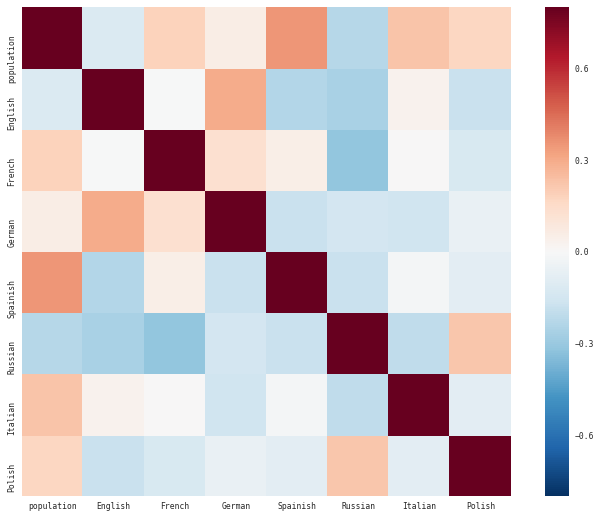

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(context = "paper", font = "monospace")

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(EBS386.corr(), vmax = .8, square = True)

In [59]:
EBS386_drop_population = EBS386[[column for column in EBS386.columns if column != "population"]]

EBS386_drop_population.corr()

,English,French,German,Spainish,Russian,Italian,Polish
English,1.000000,-0.004971,0.294240,-0.232710,-0.258460,0.036899,-0.178720
French,-0.004971,1.000000,0.131126,0.055318,-0.318392,0.002619,-0.128571
German,0.294240,0.131126,1.000000,-0.175518,-0.148437,-0.161343,-0.057373
Spainish,-0.232710,0.055318,-0.175518,1.000000,-0.178545,-0.014994,-0.082364
Russian,-0.258460,-0.318392,-0.148437,-0.178545,1.000000,-0.203087,0.220810
Italian,0.036899,0.002619,-0.161343,-0.014994,-0.203087,1.000000,-0.084138
Polish,-0.178720,-0.128571,-0.057373,-0.082364,0.220810,-0.084138,1.000000


# language inability correlations

## complete language inability (0%)

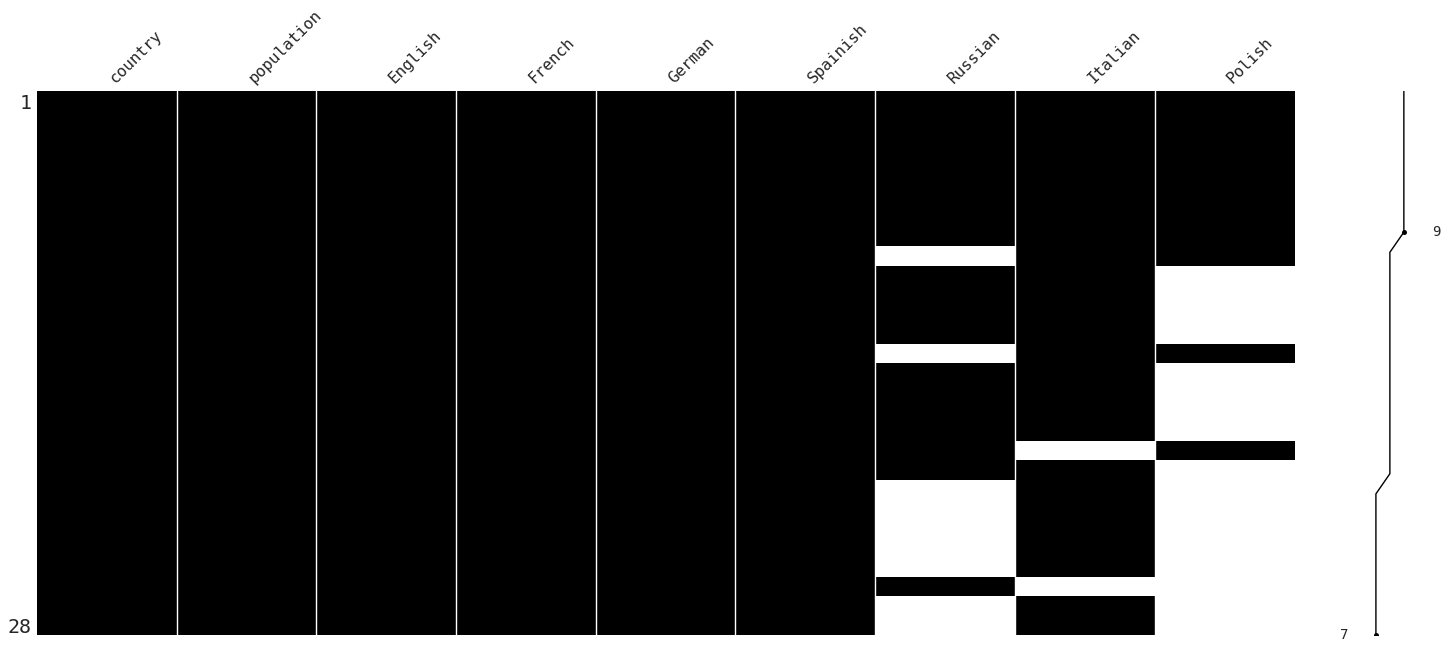

In [61]:
import missingno
import numpy as np

# replace all 0% abilities with null
EBS386_with_null_values = EBS386.replace(to_replace = 0, value = np.nan)
EBS386_with_null_values_sorted = missingno.nullity_sort(EBS386_with_null_values, sort = "descending")

missingno.matrix(EBS386_with_null_values_sorted, color = (0, 0, 0))

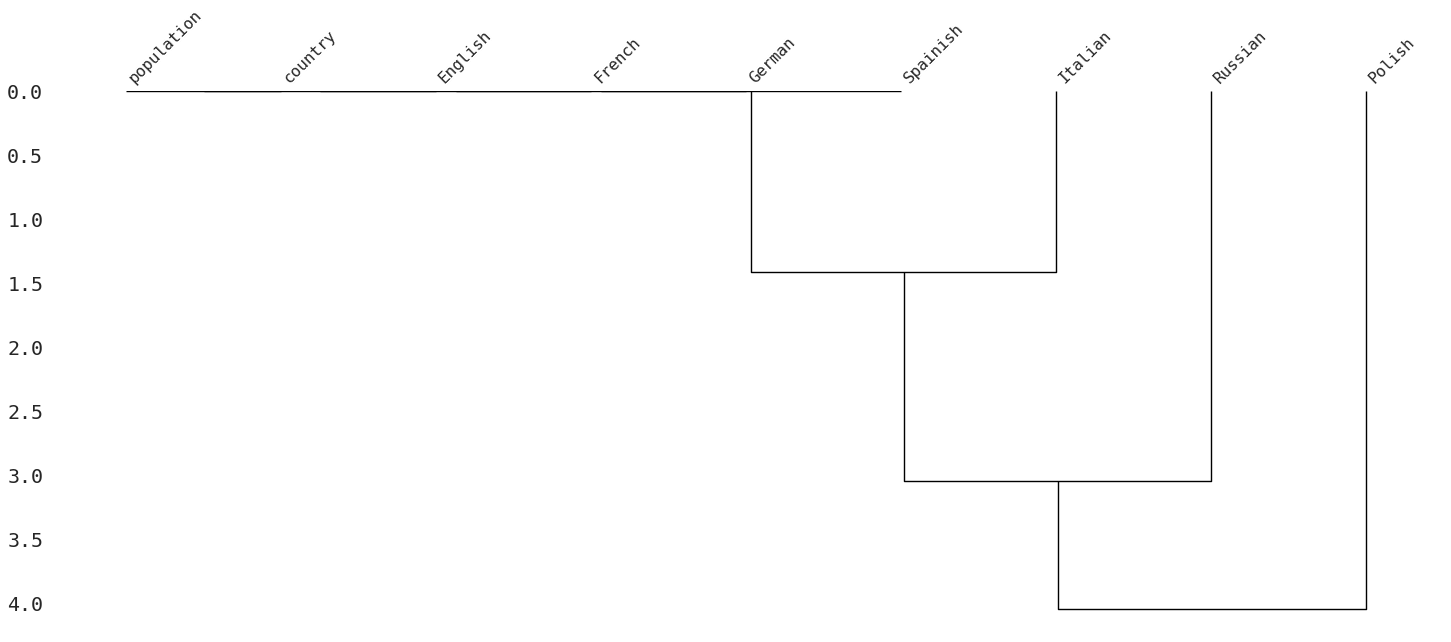

In [62]:
missingno.dendrogram(EBS386_with_null_values)

## language inability < 10%

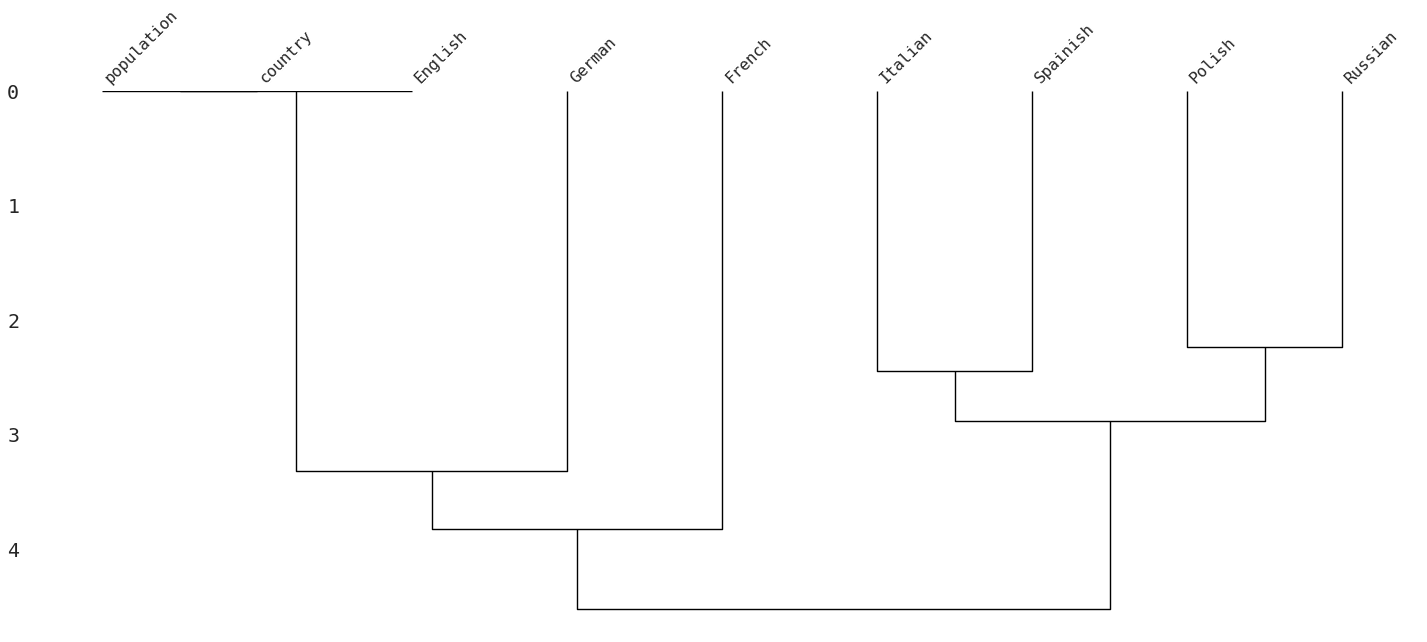

In [63]:
EBS386 = pd.read_csv("EBS386.csv", delimiter = ",")

# replace all < 10% abilities with null
EBS386[EBS386.drop("population", axis = 1) < 10] = np.nan

missingno.dendrogram(EBS386)

## language inability < 90%

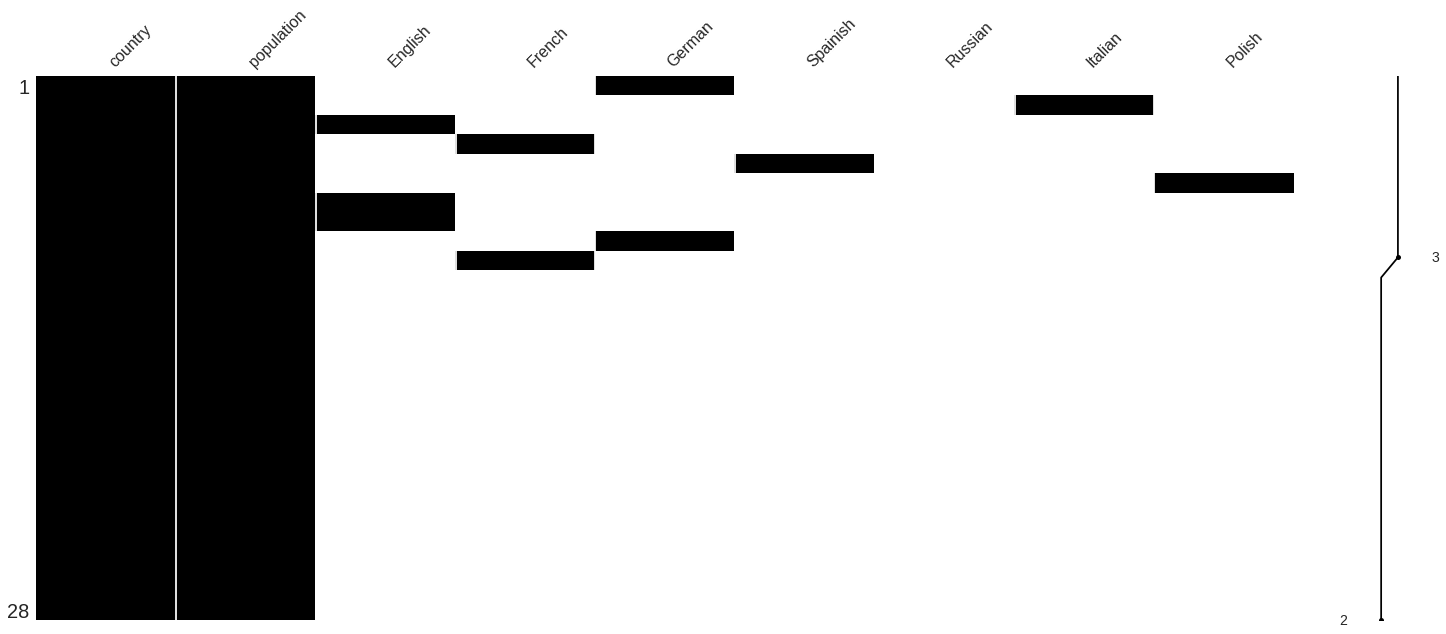

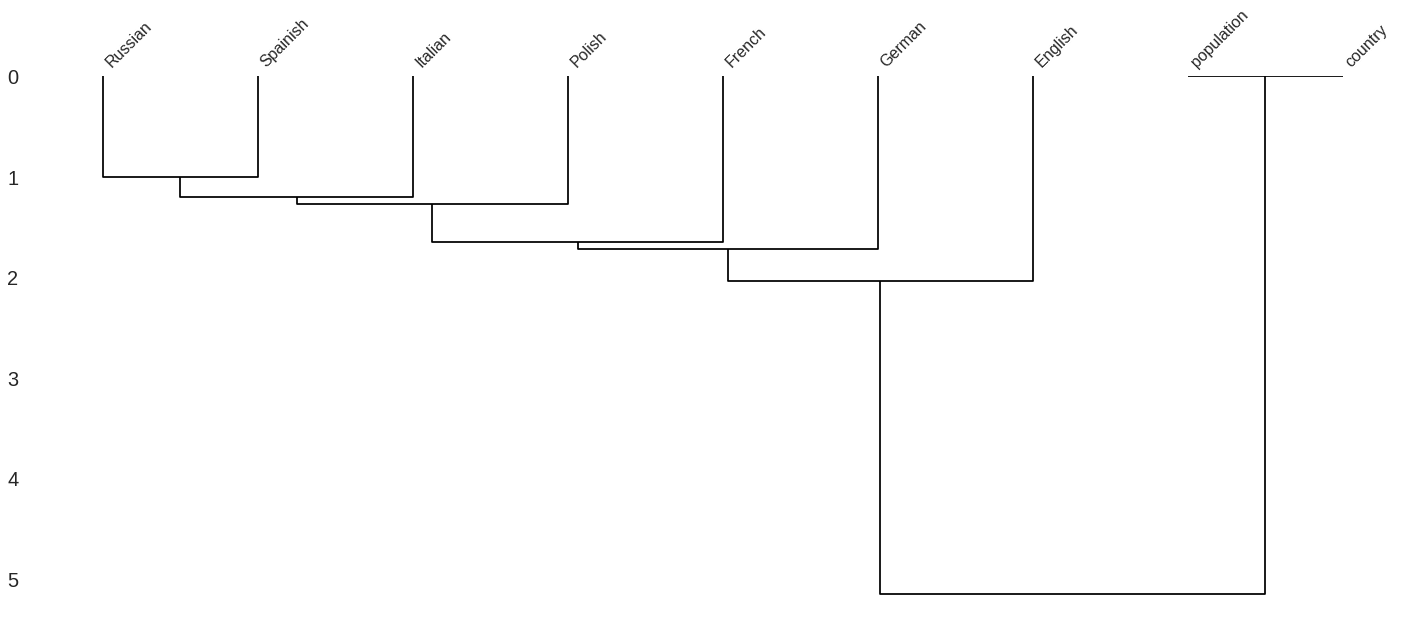

In [66]:
EBS386 = pd.read_csv("EBS386.csv", delimiter = ",")

# replace all < 90% abilities with null
EBS386[EBS386.drop("population", axis = 1) < 90] = np.nan

missingno.matrix(missingno.nullity_sort(EBS386, sort = "descending"), color = (0, 0, 0))
missingno.dendrogram(EBS386)

# histograms (with languages sorted by ability)

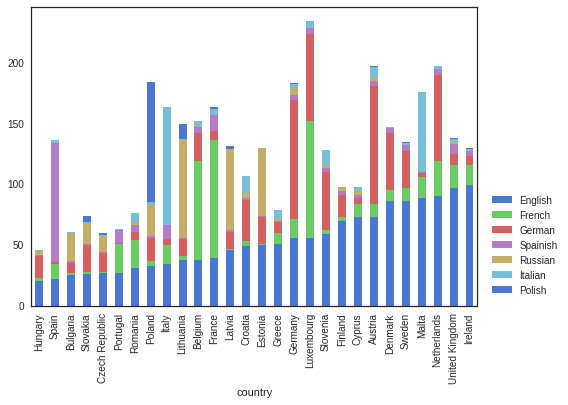

In [67]:
sns.set(color_codes = True)
sns.set(style = "white", palette = "muted")

EBS386 = pd.read_csv("EBS386.csv", delimiter = ",")

EBS386 = EBS386.sort_values(by = ["English", "French", "German", "Spainish", "Russian", "Italian", "Polish"], ascending = True)

EBS386.drop("population", axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.4))

## exclude Russian

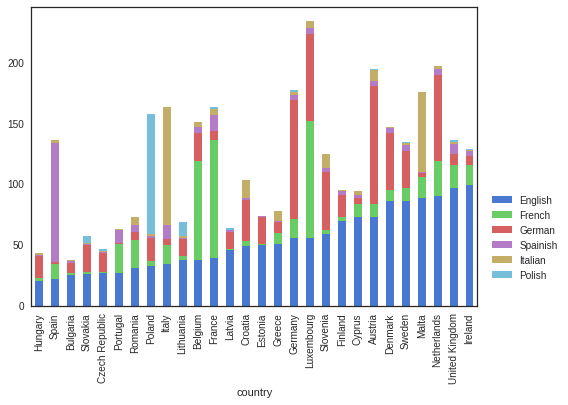

In [68]:
EBS386.drop(["population", "Russian"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.4))

## exclude Russian and German

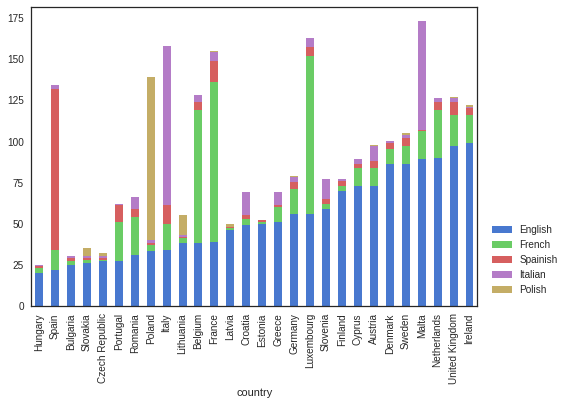

In [69]:
EBS386.drop(["population", "Russian", "German"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.3))

## include Brexit, exclude Russian and German

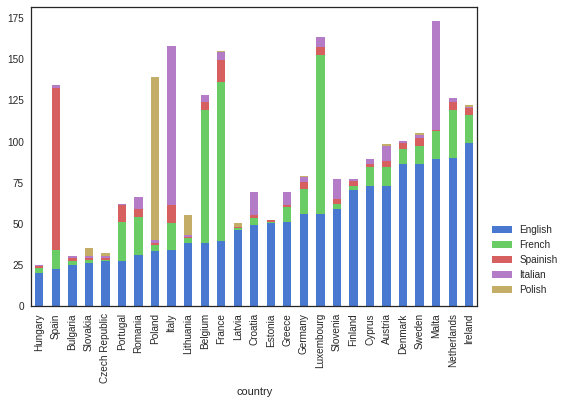

In [70]:
EBS386 = EBS386[EBS386.country != "United Kingdom"]

EBS386.drop(["population", "Russian", "German"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.3))

# World Happiness Report 2017

In [72]:
WHR2017 = pd.read_csv("World_Happiness_Report_2017.csv", delimiter = ",")

WHR2017[0:5]

,Overall Rank,Change in rank,Country,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
0,1,3.0,Norway,7.537,0.039,1.616,1.534,0.797,0.635,0.362,0.316,2.277
1,2,-1.0,Denmark,7.522,-0.004,1.482,1.551,0.793,0.626,0.355,0.401,2.314
2,3,0.0,Iceland,7.504,0.003,1.481,1.611,0.834,0.627,0.476,0.154,2.323
3,4,-2.0,Switzerland,7.494,-0.015,1.565,1.517,0.858,0.620,0.291,0.367,2.277
4,5,0.0,Finland,7.469,0.056,1.444,1.540,0.809,0.618,0.245,0.383,2.430


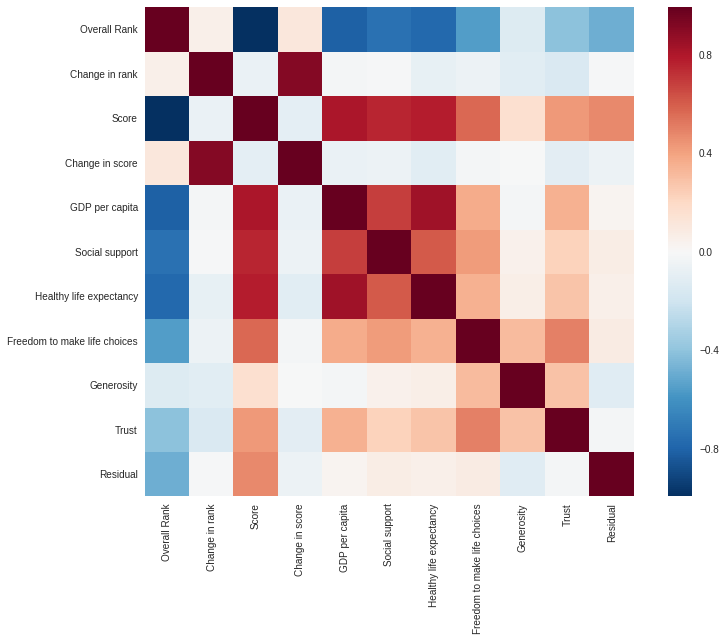

In [73]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(WHR2017.corr(), vmax = .8, square = True)

# merge World Happiness Report 2017 with European country language abilities

In [74]:
EBS386 = pd.read_csv("EBS386.csv", delimiter = ",")
EBS386.rename(columns = {"country": "Country"}, inplace = True)
languages_WHR2017
languages_WHR2017 = pd.merge(data, WHR2017, on = "Country", how = "outer")

languages_WHR2017[0:5]

,Country,population,English,French,German,Spainish,Russian,Italian,Polish,Overall Rank,Change in rank,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
0,Germany,64409146.0,56.0,15.0,98.0,4.0,6.0,3.0,1.0,16,0.0,6.951,-0.043,1.488,1.473,0.799,0.563,0.336,0.277,2.016
1,Italy,51862391.0,34.0,16.0,5.0,11.0,0.0,97.0,0.0,48,2.0,5.964,-0.013,1.395,1.445,0.853,0.256,0.173,0.028,1.813
2,United Kingdom,51848010.0,97.0,19.0,9.0,8.0,2.0,2.0,1.0,19,4.0,6.714,-0.011,1.442,1.496,0.805,0.508,0.493,0.265,1.704
3,France,47756439.0,39.0,97.0,8.0,13.0,0.0,5.0,1.0,31,1.0,6.442,-0.036,1.431,1.388,0.844,0.470,0.130,0.173,2.006
4,Spain,39127930.0,22.0,12.0,2.0,98.0,0.0,2.0,0.0,34,3.0,6.403,0.042,1.384,1.532,0.889,0.409,0.190,0.071,1.928


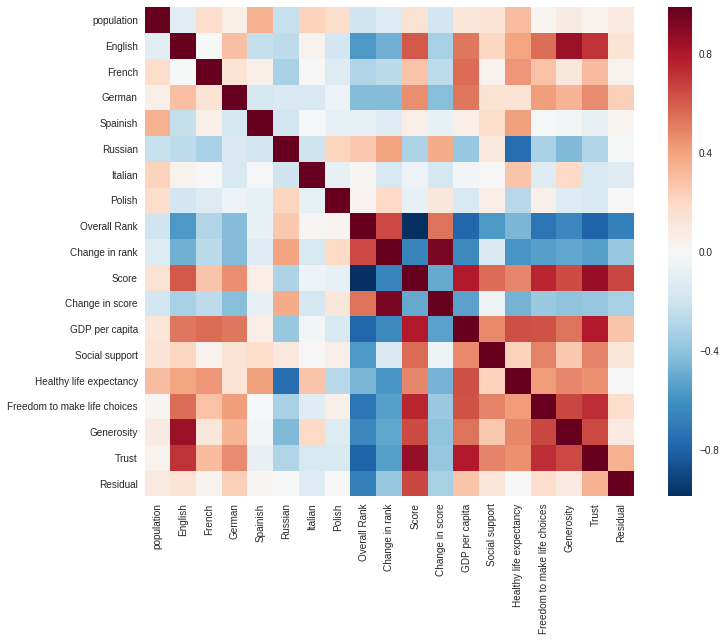

In [75]:
languages_WHR2017_Europe = languages_WHR2017[0:28]

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(languages_WHR2017_Europe.corr(), vmax = .8, square = True)

# correlations of languages with World Happiness Report 2017 metrics

## sort by WHR2017 score

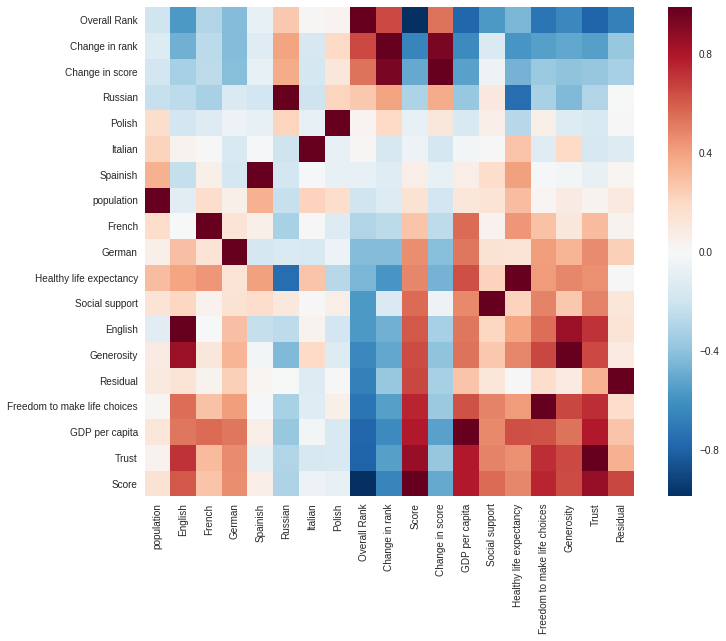

In [87]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(languages_WHR2017_Europe.corr().sort_values("Score"), vmax = .8, square = True)

### observations

- Higher scores are had by English, German and French speakers.

## sort by WHR2017 change in score

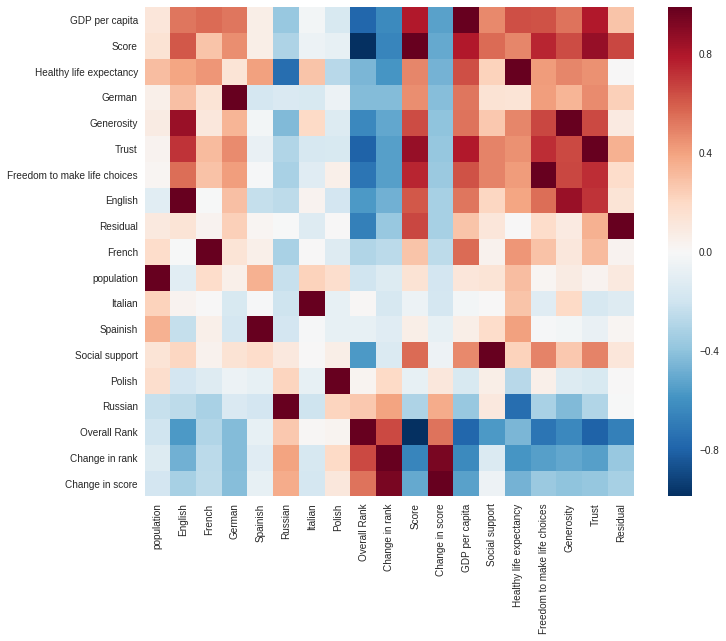

In [88]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(languages_WHR2017_Europe.corr().sort_values("Change in score"), vmax = .8, square = True)

### observations

- Higher positive changes in scores are had by Russian and Polish speakers.

## hierarchically clustered heatmap

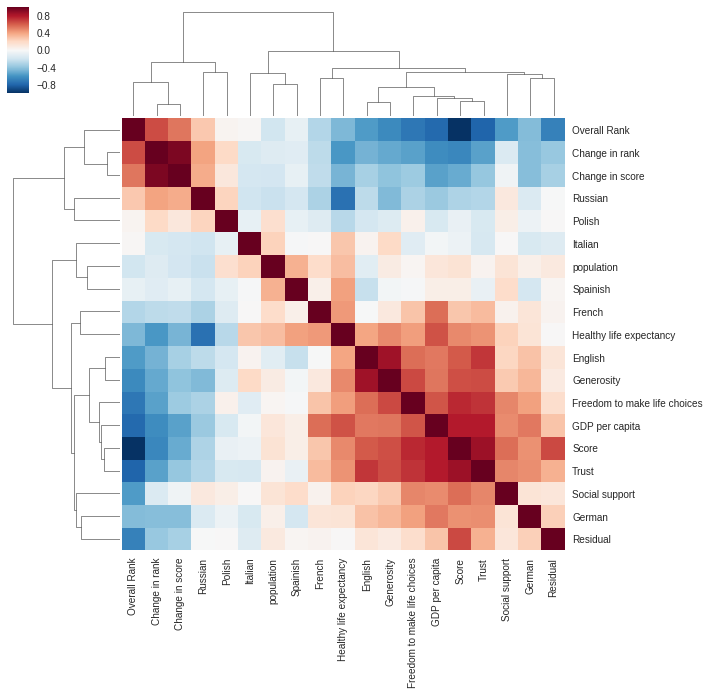

In [110]:
plot = sns.clustermap(languages_WHR2017_Europe.drop("Country", axis = 1).corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)